In [3]:
import matplotlib.pyplot as plt
from astropy.io import ascii
import random
import numpy as np
import math

In [59]:
class Kmean:
    def __init__(self,data,init='rand',C=3):
        self.data=data
        self.init=init
        self.C=C
        self.data['y']=-1
        self.colors=['r','g','b','cyan','magenta','purple','k']
        if self.C>len(self.colors):
            self.colors=self.colors*int(np.ceil(self.C/len(self.colors)))
        self.Cov=np.cov(list(self.data.values()))
        if self.init=='rand':
            self.Random()
            self.mean()
        elif self.init=='forgy':
            self.Forgy()
        elif self.init=='K++':
            self.Kpp()
        else:
            print('Initialization type not recognized defaulting to random')
            self.init='rand'
            self.Random()
            self.mean()
        self.cluster()
    def Random(self):
            self.mu=[[-1,-1]]*self.C
            y=np.random.randint(0,self.C,len(self.data['y']))
            test=1
            for i in range(self.C):
                test*=len(np.where(y==i)[0])
            if test==0:
                while test==0:
                    y=np.random.randint(0,self.C,len(self.data['y']))
                    test=1
                    for i in range(self.C):
                        test*=len(np.where(y==i)[0])
            self.data['y']=y
    def Forgy(self):
        self.mu=[]
        sample=[]
        while len(np.unique(sample))!=self.C:
            sample=np.random.randint(0,len(self.data),self.C)
        for a in sample:
            muk=list(self.data['col1','col2'][a].values())
            self.mu.append(muk)       
    def Kpp(self):
        self.mu=[]
        self.mu.append(self.data['col1','col2'][np.random.randint(0,len(self.data))])
        while len(self.mu)!=self.C:
            prob=np.zeros(len(self.data))
            for i in range(len(self.data)):
                t=[0]*len(self.mu)
                for k in range(len(self.mu)):
                    t[k]=self.Dist2(self.data['col1','col2'][i],self.mu[k])**2
                prob[i]=min(t)
            prob/=sum(prob)
            s=np.random.choice(np.arange(0,len(prob),1),p=prob)
            self.mu.append(self.data['col1','col2'][s])
    def Dist2(self,x,y):
        d=0
        if len(x)==len(y):
            for z in range(len(y)):
                d+=(x[z]-y[z])**2
        return d
    def cluster(self):
        for i in range(len(self.data)):
            t=[0]*self.C
            for k in range(self.C):
                t[k]=self.Dist2(self.data['col1','col2'][i],self.mu[k])
            self.data[i]['y']=np.argmin(t)
    def mean(self):
        for c in range(self.C):
            z=np.where(self.data['y']==c)
            muk=[np.mean(self.data[z]['col1']),np.mean(self.data[z]['col2'])]
            self.mu[c]=muk
    def Loss(self,norm=False):
        E=0
        for c in range(self.C):
            z=np.where(self.data['y']==c)
            for i in z[0]:
                E+=self.Dist2(self.data['col1','col2'][i],self.mu[c])
        if norm:
            return E/np.trace(self.Cov)
        else:
            return(E)
    def plot(self):
        for i in range(len(self.data)):
            plt.scatter(self.data[i]['col1'],self.data[i]['col2'],color=self.colors[self.data[i]['y']])
        for c in range(self.C):
            plt.scatter(self.mu[c][0],self.mu[c][1],marker='*',color=self.colors[c],edgecolors='y')
        plt.show()
    def run(self,itt=100):
        for i in range(itt):
            self.oldmu=self.mu.copy()
            self.mean()
            self.cluster()
            if self.oldmu==self.mu:
                print('Convergence Reached',i,' Itterations')
                break
        if i ==itt:
            print('Max Itteration Reached')

In [62]:
three=ascii.read('atoll.csv')

Convergence Reached 4  Itterations


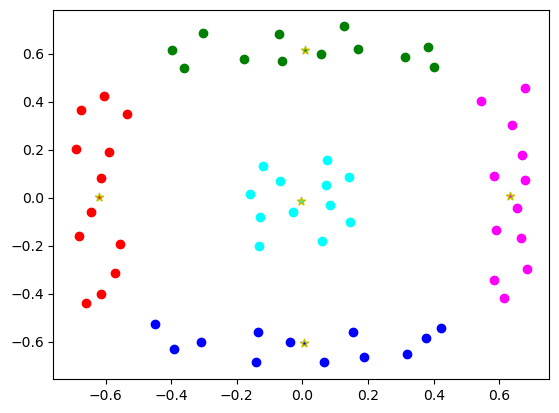

In [64]:
K=Kmean(three,init='rand',C=5)
K.run()
K.plot()

In [44]:
K.Loss()

3.2973590259018777

In [45]:
K.Loss(True)

8.618627944278886

In [16]:
['2']*int(np.ceil(3/2))


['2', '2']

array([0.00378333, 0.0011    ])